# Quickstart tutorial

So you’ve recently finished a new ACCESS model run and you want to create an Intake-ESM datastore for that run? This tutorial demonstrates how you can do that using Builders from the `access-nri-intake` Python package. You can download the Jupyter notebook rendered below from [here](https://github.com/ACCESS-NRI/access-nri-intake-catalog/blob/main/docs/datastores/quickstart.ipynb) and run it yourself in an NCI ARE instance, or on your own compute system.

```{note}
If you don't know what a Builder is, see [Datastore Builders](builders.rst).
```

In [1]:
import warnings

warnings.filterwarnings("ignore") # Suppress warnings for these docs

## Building an Intake-ESM datastore - the quick way

As of `access_nri_intake` version 1.1.0, it is possible to build an ESM-datastore from the command line, using the `build-esm-datastore` utility.

Usage is as follows:

In [ ]:
user@local_machine $ ssh gadi 
user@gadi $ mkdir catalog_dir && cd catalog_dir # Change catalog_dir to your desired directory
user@gadi $ module load conda/analysis3
user@gadi $ build-esm-datastore --builder Mom6Builder --expt-dir  /g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2_first_run/ --cat-dir .

This will create a new Intake-ESM catalog in the `catalog_dir` directory, using the `Mom6Builder` builder, and the experiment directory `/g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/`.

The first time you run `build-esm-datastore`, you can expect to see some output like this:

In [ ]:
$ build-esm-datastore --builder Mom6Builder --expt-dir  /g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2_first_run/ --cat-dir .
Generating esm-datastore for /g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2
Building esm-datastore...
/home/189/ct1163/catalog_dir/venv/lib/python3.11/site-packages/access_nri_intake/source/utils.py:140: UserWarning: Time coordinate does not include bounds information. Guessing start and end times.
  warnings.warn(
...
Sucessfully built esm-datastore!
Saving esm-datastore to /home/189/ct1163/catalog_dir
/home/189/ct1163/catalog_dir/venv/lib/python3.11/site-packages/intake_esm/cat.py:186: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  data = self.dict().copy()
Successfully wrote ESM catalog json file to: file:///home/189/ct1163/catalog_dir/experiment_datastore.json
Hashing catalog to prevent unnecessary rebuilds.
This may take some time...
Catalog sucessfully hashed!
Datastore sucessfully written to /home/189/ct1163/catalog_dir/experiment_datastore.json!
Please note that this has not added the datastore to the access-nri-intake catalog.
To add to catalog, please run 'scaffold-catalog-entry' for help on how to do so.
To open the datastore, run `intake.open_esm_datastore('/home/189/ct1163/catalog_dir/experiment_datastore.json', columns_with_iterables=['variable'])` in a Python session.
$


If you rerun `build-esm-datastore`, you can expect to see something like this if the tool detects a valid & current datastore in the specified directory:

In [ ]:
$ build-esm-datastore --builder Mom6Builder --expt-dir  /g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2_first_run/ --cat-dir .
Datastore found in current directory, verifying datastore integrity...
Parsing experiment dir...
Datastore integrity verified!
Datastore found in /home/189/ct1163/catalog_dir/experiment_datastore.json!
Please note that this has not added the datastore to the access-nri-intake catalog.
To add to catalog, please run 'scaffold-catalog-entry' for help on how to do so.
To open the datastore, run `intake.open_esm_datastore('/home/189/ct1163/catalog_dir/experiment_datastore.json', columns_with_iterables=['variable'])` in a Python session.
$

...or this if the tool detects that the datastore is out of date, and needs to be regenerated:

In [ ]:
$ build-esm-datastore --builder Mom6Builder --expt-dir  /g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2_first_run/ --cat-dir .
Datastore found in current directory, verifying datastore integrity...
Parsing experiment dir...
Experiment directory and datastore do not match (missing files from datastore). Datastore regeneration required...
Building esm-datastore...
...
Sucessfully built esm-datastore!
Saving esm-datastore to /home/189/ct1163/catalog_dir
/home/189/ct1163/catalog_dir/venv/lib/python3.11/site-packages/intake_esm/cat.py:186: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  data = self.dict().copy()
Successfully wrote ESM catalog json file to: file:///home/189/ct1163/catalog_dir/experiment_datastore.json
Hashing catalog to prevent unnecessary rebuilds.
This may take some time...
Catalog sucessfully hashed!
Datastore sucessfully written to /home/189/ct1163/catalog_dir/experiment_datastore.json!
Please note that this has not added the datastore to the access-nri-intake catalog.
To add to catalog, please run 'scaffold-catalog-entry' for help on how to do so.
To open the datastore, run `intake.open_esm_datastore('/home/189/ct1163/catalog_dir/experiment_datastore.json', columns_with_iterables=['variable'])` in a Python session.

To see the full list of options, run `build-esm-datastore --help`:

In [ ]:
$ build-esm-datastore --help
usage: build-esm-datastore [-h] [--builder BUILDER] [--builder-kwargs [BUILDER_KWARGS ...]] [--expt-dir EXPT_DIR]
                           [--cat-dir CAT_DIR] [--datastore-name DATASTORE_NAME] [--description DESCRIPTION]

Build an esm-datastore by inspecting a directory containing model outputs. If no datastore exists, a new one will be
created. If a datastore exists, it's integrity will be verified, and the datastore regenerated if necessary.

options:
  -h, --help            show this help message and exit
  --builder BUILDER     Builder to use to create the esm-datastore. Builders are defined the source.builders module.
                        Currently available options are: AccessOm2Builder, AccessOm3Builder, Mom6Builder,
                        AccessEsm15Builder, AccessCm2Builder. To build a datastore for a new model, please contact the
                        ACCESS-NRI team.
  --builder-kwargs [BUILDER_KWARGS ...]
                        Additional keyword arguments to pass to the builder. Should be in the form of key=value.
  --expt-dir EXPT_DIR   Directory containing the model outputs to be added to the esm-datastore. Defaults to the
                        current working directory. Although builders support adding multiple directories, this tool
                        only supports one directory at a time - at present.
  --cat-dir CAT_DIR     Directory in which to place the catalog.json file. Defaults to the value of --expt-dir if not
                        set.
  --datastore-name DATASTORE_NAME
                        Name of the datastore to use. If not provided, this will default to 'experiment_datastore'.
  --description DESCRIPTION
                        Description of the datastore. If not provided, a default description will be used:
                        'esm_datastore for the model output in {--expt-dir}'

If you want to place multiple datastores in the same directory, you will need to specify different datastore names, using the `--datastore-name` option. For example:

```bash
$ build-esm-datastore --builder Mom6Builder --expt-dir  /g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/ --cat-dir . --datastore-name mom6_panant_01
...
$ build-esm-datastore --builder Mom6Builder --expt-dir  /g/data/ik11/outputs/mom6-panan/panant-02-zstar-ACCESSyr2/ --cat-dir . --datastore-name mom6_panant_02
```


In addition, you can access the `build-esm-datastore` functionality from within a python script, using the `use_datastore` function:


In [ ]:
from access_nri_intake.experiment import use_datastore
from access_nri_intake.source.builders import Mom6Builder

ds = use_datastore(
    experiment_dir="/g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2_first_run/",
    catalog_dir="/home/189/ct1163/catalog_dir/",
    builder=Mom6Builder,
    datastore_name="experiment_datastore",
    description="PanAnt experiment with ACCESS-OM2-01 forcing",
              )
ds

Datastore found in /home/189/ct1163/catalog_dir, verifying datastore integrity...
Parsing experiment dir...
Datastore integrity verified!
Datastore found in /home/189/ct1163/catalog_dir/experiment_datastore.json!
Please note that this has not added the datastore to the access-nri-intake catalog.
To add to catalog, please run 'scaffold_catalog_entry' for help on how to do so.


,unique
filename,12325
file_id,13
path,12325
filename_timestamp,82
frequency,3
start_date,3977
end_date,3978
variable,122
variable_long_name,17
variable_standard_name,17


For even more fine grained control, follow the guide below:

## Building an Intake-ESM datastore - using builders directly

In the rest of this tutorial, we'll build an Intake-ESM datastore for an ACCESS-OM2 model run that is currently not included in the ACCESS-NRI catalog. The base output directory for this model run is:

`/g/data/ik11/outputs/access-om2/1deg_iamip2_CMCC-ESM2ssp126`

which comprises about 150 GB of netcdf files. Because this is an ACCESS-OM2 run, we'll use the `AccessOm2Builder`

In [2]:

from access_nri_intake.source.builders import AccessOm2Builder

Building the Intake-ESM catalog should be as simple as passing the model run base output directory to the Builder and calling `.build()`. The build is parallelized so will be faster if you throw more resources at it. The following was run using an XX-Large `normalbw` ARE instance (28 cpus). Note, a warning is thrown below because core metadata is missing (and thus inferred) from some of the files in this model output. 

```{note}
The `openmpi` module now needs to be loaded explicitly on Gadi for the following line to work. This should have been placed in the 'Modules' section of the 'Advanced options' on ARE.
```

In [3]:
%%time

builder = AccessOm2Builder(
    path="/g/data/ik11/outputs/access-om2/1deg_iamip2_CMCC-ESM2ssp126"
).build()

/home/120/mcw120/access-nri/access-nri-intake-catalog/src/access_nri_intake/source/utils.py:113: UserWarning: Time coordinate does not include bounds information. Guessing start and end times.
  warnings.warn(
/home/120/mcw120/access-nri/access-nri-intake-catalog/src/access_nri_intake/source/utils.py:113: UserWarning: Time coordinate does not include bounds information. Guessing start and end times.
  warnings.warn(
/home/120/mcw120/access-nri/access-nri-intake-catalog/src/access_nri_intake/source/utils.py:113: UserWarning: Time coordinate does not include bounds information. Guessing start and end times.
  warnings.warn(
/home/120/mcw120/access-nri/access-nri-intake-catalog/src/access_nri_intake/source/utils.py:113: UserWarning: Time coordinate does not include bounds information. Guessing start and end times.
  warnings.warn(
/home/120/mcw120/access-nri/access-nri-intake-catalog/src/access_nri_intake/source/utils.py:113: UserWarning: Time coordinate does not include bounds informatio

CPU times: user 5.07 s, sys: 1.41 s, total: 6.48 s
Wall time: 22 s


In [4]:
AccessOm2Builder.parser("/g/data/ik11/outputs/access-om2/1deg_iamip2_CMCC-ESM2ssp126/output142/ocean/oceanbgc-scalar-1-monthly-ym_2100_02.nc")

{'filename': 'oceanbgc-scalar-1-monthly-ym_2100_02.nc',
 'file_id': 'oceanbgc_scalar_1_monthly_ym_XXXX_XX',
 'path': '/g/data/ik11/outputs/access-om2/1deg_iamip2_CMCC-ESM2ssp126/output142/ocean/oceanbgc-scalar-1-monthly-ym_2100_02.nc',
 'filename_timestamp': '2100_02',
 'frequency': '1mon',
 'start_date': '2100-02-01, 00:00:00',
 'end_date': '2101-02-01, 00:00:00',
 'variable': ['scalar_axis', 'time', 'total_aco2_flux', 'total_co2_flux'],
 'variable_long_name': ['none',
  'time',
  'Total surface flux of inorganic C (natural + anthropogenic) into ocean',
  'Total surface flux of inorganic C (natural) into ocean'],
 'variable_standard_name': ['', '', '', ''],
 'variable_cell_methods': ['', '', 'time: point', 'time: point'],
 'variable_units': ['none',
  'days since 1900-01-01 00:00:00',
  'Pg/yr',
  'Pg/yr'],
 'realm': 'ocean'}

The previous cell builds the Intake-ESM datastore in memory. We'll want to save it somewhere so we can reuse and share it. The following cell will create two new files (a `.json` and `.csv` file) in your current work directory. These files are how Intake-ESM datastores are stored on disk.

In [5]:
builder.save(
    name="mydatastore",
    description="An example datastore for ACCESS-OM2 1deg_iamip2_CMCC-ESM2ssp126",
)

Successfully wrote ESM catalog json file to: file:///home/120/mcw120/access-nri/access-nri-intake-catalog/docs/datastores/mydatastore.json


```{note}
All access-nri-intake Builders require that the output base `path` is provided. Some also have additional optional arguments. For example, `AccessCm2Builder` and `AccessEsm15Builder` can also receive an optional `ensemble` parameter that can be used to create datastores of ensemble outputs (see [Datastore Builders](builders.rst))
```

## Using your Intake-ESM datastore

Now we can use our Intake-ESM datastore to query and load the model data. Only the basics are shown in this tutorial. You can read the Intake-ESM documentation [here](https://intake-esm.readthedocs.io/en/stable/index.html).

We can load the datastore directly using `intake`.

In [6]:
import intake

cat = intake.open_esm_datastore(
    "./mydatastore.json",
    columns_with_iterables=["variable"] # This is important
)

We can see what datasets are available in our datastore by looking at the output of the `keys()` method. Here, a "dataset" is a set of contiguous files that we can load and combine together using xarray. It's good to check that these make sense when creating new datastores.

In [7]:
cat.keys()

['iceh_XXX_daily.1day',
 'ocean_2d_area_t.fx',
 'ocean_2d_area_u.fx',
 'ocean_2d_drag_coeff.fx',
 'ocean_2d_dxt.fx',
 'ocean_2d_dxu.fx',
 'ocean_2d_dyt.fx',
 'ocean_2d_dyu.fx',
 'ocean_2d_geolat_c.fx',
 'ocean_2d_geolat_t.fx',
 'ocean_2d_geolon_c.fx',
 'ocean_2d_geolon_t.fx',
 'ocean_2d_ht.fx',
 'ocean_2d_hu.fx',
 'ocean_2d_kmt.fx',
 'ocean_2d_kmu.fx',
 'ocean_2d_mld_1_daily_mean_ym_XXXX_XX.1day',
 'ocean_2d_surface_salt_1_daily_mean_ym_XXXX_XX.1day',
 'ocean_2d_surface_temp_1_daily_mean_ym_XXXX_XX.1day',
 'ocean_3d_salt_1_yearly_mean_ym_XXXX_XX.1yr',
 'ocean_3d_temp_1_yearly_mean_ym_XXXX_XX.1yr',
 'ocean_scalar_1_monthly_ym_XXXX_XX.1mon',
 'oceanbgc_2d_npp1_1_daily_mean_y_XXXX.1day',
 'oceanbgc_2d_npp2d_1_daily_mean_y_XXXX.1day',
 'oceanbgc_2d_pprod_gross_2d_1_daily_mean_y_XXXX.1day',
 'oceanbgc_2d_radbio1_1_daily_mean_y_XXXX.1day',
 'oceanbgc_2d_stf09_1_daily_mean_y_XXXX.1day',
 'oceanbgc_2d_surface_adic_1_daily_mean_ym_XXXX_XX.1day',
 'oceanbgc_2d_surface_alk_1_daily_mean_ym_XXXX_XX

All access-nri-intake Builders label datasets using a file identifier and a frequency: `file_id.frequency`. The file id is parsed from the filenames. The "X"s are there in place of time stamps that were included in the filenames for some of the data. The dataset labels above look sensible for the ACCESS-OM2 data were working with here, which have a separate set of files for each output variable.

```{note}
If your dataset labels don't look right, please open an issue [here](https://github.com/ACCESS-NRI/access-nri-intake-catalog/issues).
```

It's easy to search for datasets in the datastore containing a particular variable and load them as xarray Datasets. (Note for analysing large datasets, you may want to first start a dask cluster).

In [8]:
ds = cat.search(variable="temp").to_dask()

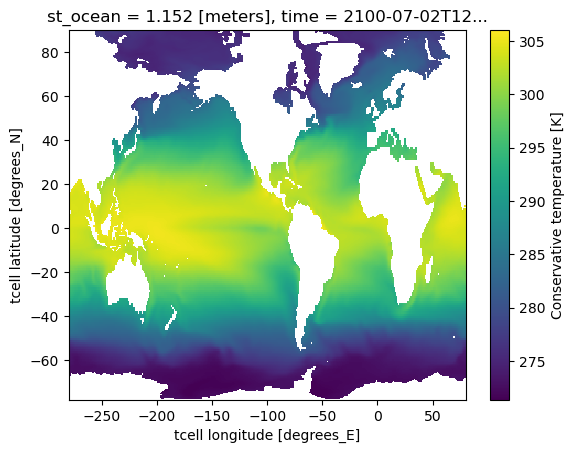

In [9]:
ds["temp"].isel(time=-1, st_ocean=0).plot()

Once you've created a datastore for your model run and you think it's working as expected, please consider adding it to the ACCESS-NRI catalog so that others can easily find and use your great data - see [Adding datastores to the catalog](adding.rst).